<a href="https://colab.research.google.com/github/victoriaPaez/MujeresDigitales2021/blob/main/DTaller_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigando los accidentes de tránsito en Nueva York

In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las vías de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como comuna, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema empresarial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV que contiene detalles sobre cada accidente como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

*    Leer, transformar y preparar datos para su visualización
*    Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

**1.    ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?**
**2.   Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?**
**3.    ¿Hay más accidentes entre semana que los fines de semana?**
**4.    ¿Cuál es la proporción de accidentes por área por comuna? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?** 
**5.    Para cada comuna, ¿durante qué horas es más probable que ocurran accidentes?**
**6.    ¿Cuáles son las 5 principales causas de accidentes en la ciudad? **

In [19]:
# Use la siguiente informacipón de cada comuna ("borough") para realizar los análisis

borough_data = {'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}

Tenemos las siguientes columnas

     Borough: el comuna en el que ocurrió el accidente.
     COLLISION_ID: un identificador único para esta colisión
     CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Motivos del accidente
     CROSS STREET : Calle transversal más cercana al lugar de los accidentes
     DATE: Fecha del accidente
     TIME: Hora del accidente
     DATETIME: la columna que creamos anteriormente con la combinación de fecha y hora
     LATITUDE: Latitud del accidente
     LONGITUDE: Longitud del accidente
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) INJURED: Lesión por categoría
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) KILLED: Categoría muerte sabia
     ON STREET NAME: Calle donde ocurrió el accidente
     TOTAL INJURED: Total de heridos por el accidente
     TOTAL KILLED: Total de bajas en el accidente
     VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipos de vehículos involucrados en el accidente
     ZIP CODE: código postal del lugar del accidente

Primero cargue los datos del csv a un dataframe.

**Nota:** El archivo se encuentra separado por punto y coma ( ; ) en lugar de coma ( , ), así que se debe ingresar el parámetro sep para leer el archivo. Aquí puede encontrar información:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In [ ]:
df = pd.read_csv('accidents_sample.csv',sep= ';')
df[:10]

## Parte 1: Accidentes a lo largo del tiempo

Agrupe los datos disponibles mensualmente y genere una gráfica lineal de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

In [ ]:
print(df.dtypes)
df['DATE']=pd.to_datetime(df['DATE'])
print('\n')
print(df.dtypes)

In [138]:
import datetime
df['Year'] = df['DATE'].dt.year 
df['Month'] = df['DATE'].dt.month 


In [139]:
df2=df.groupby(['Year','Month']).sum()


In [140]:
df3=df2.drop(columns=['ZIP CODE','LATITUDE','LONGITUDE','COLLISION_ID'])


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 10 Text major ticklabel objects>)

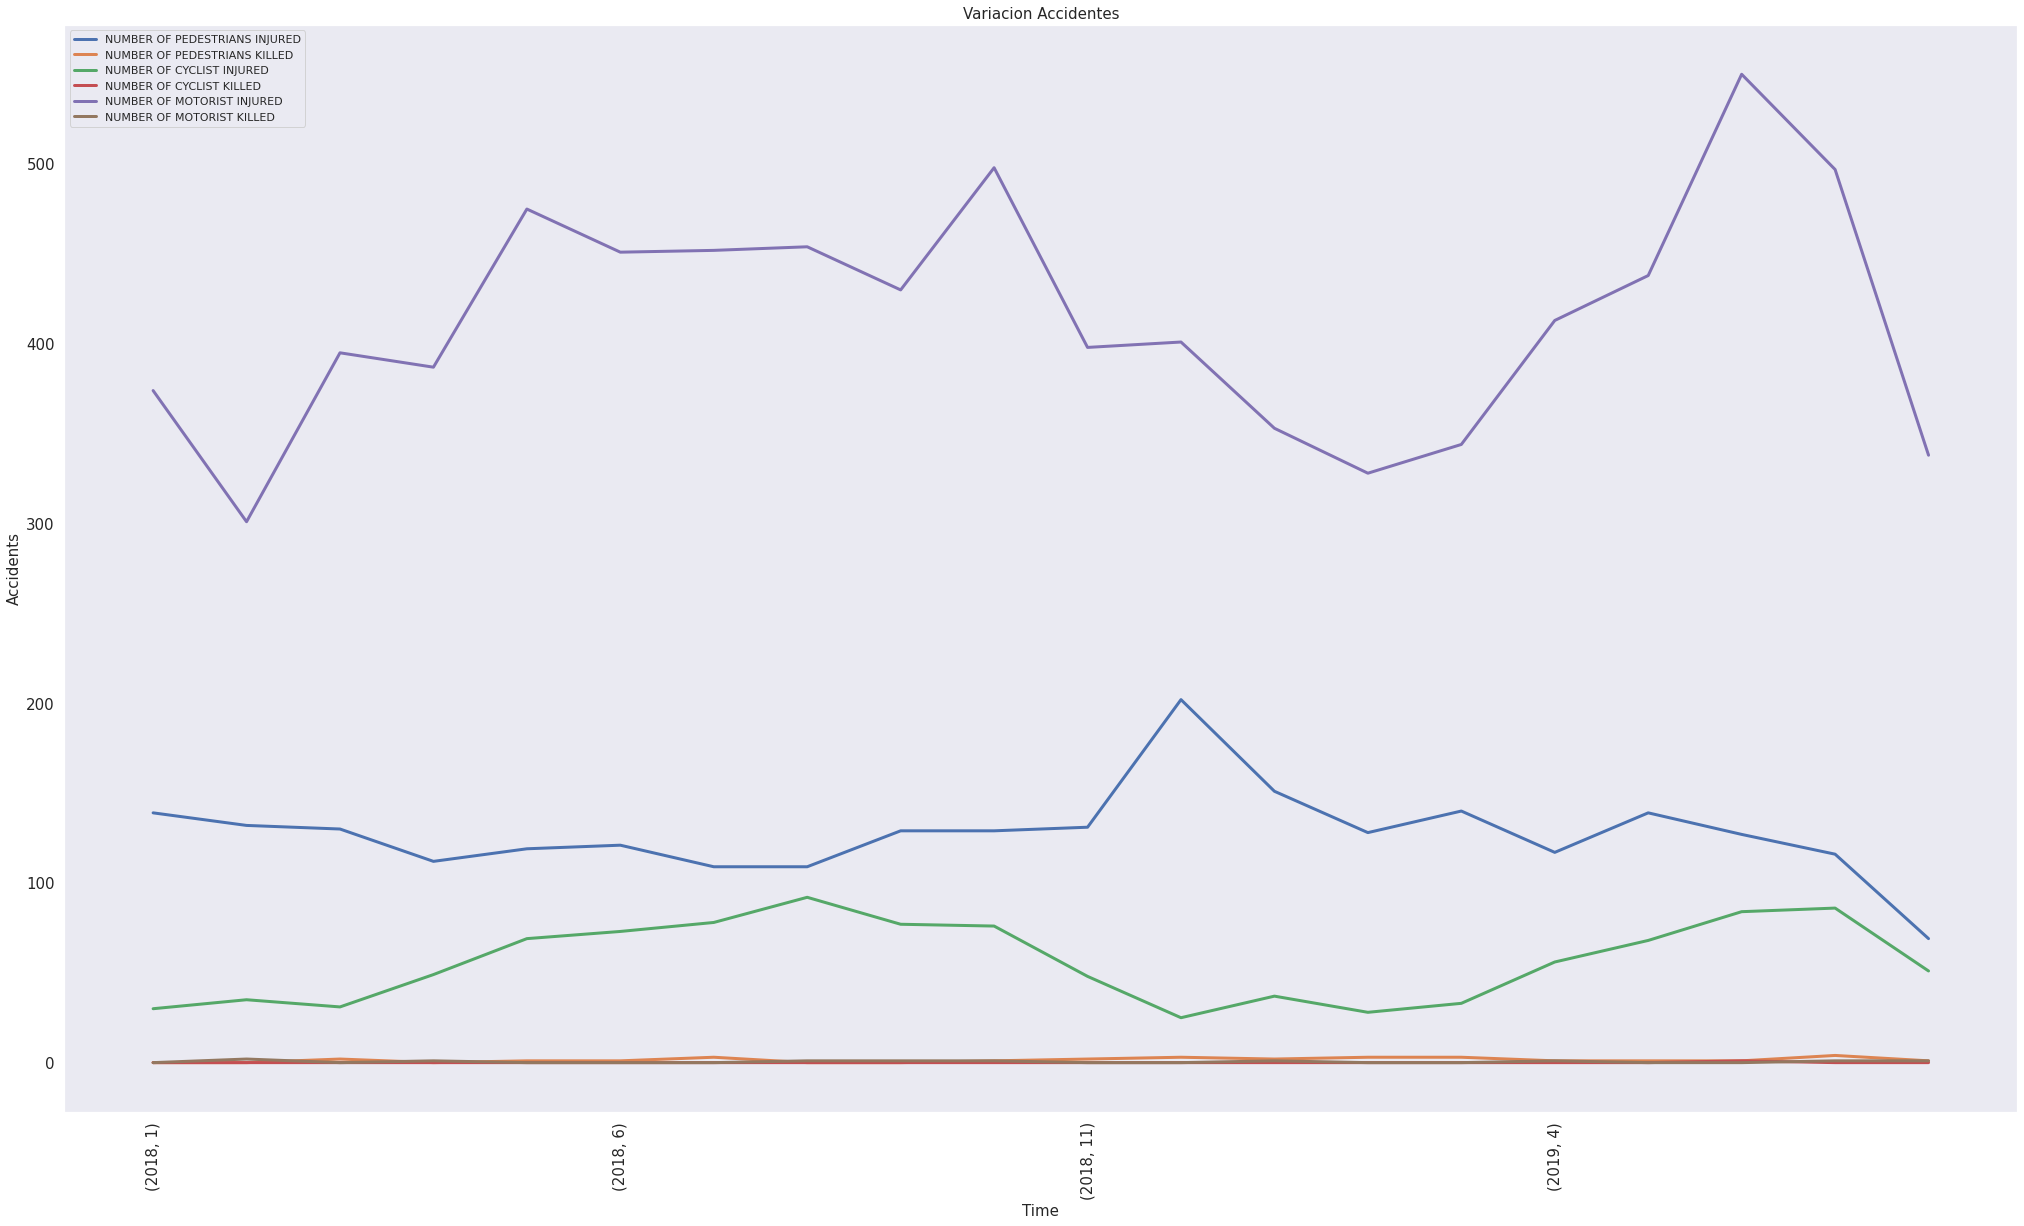

In [258]:
sns.set(rc={'figure.figsize':(35,20)})
df3.plot(kind='line',legend='Reverse', linewidth = 3,fontsize=15)
plt.ylabel('Accidents',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.grid()
plt.title("Variacion Accidentes",fontsize=15)
plt.xticks(rotation=90,fontsize=15)


con respecto al aumento del numero de accidentes se observa que: 
1. las lesiones a peatones, motociclistas y ciclistas disminuyeron
2. se presenta un pequeño aumento de peatones, ciclistas fallecidos
3. se presenta una disminutcion de motocilcistas fallecidos


## Parte 2: Puntos calientes de accidentes en un día

¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna HORA basada en los datos de la columna DATETIME, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

In [150]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('accidents_sample.csv',sep= ';')
df[:10]


In [152]:
dfp3=df.drop(columns=['BOROUGH','ON STREET NAME','ZIP CODE','LATITUDE','LONGITUDE','COLLISION_ID','VEHICLE TYPE CODE 5','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 1','CONTRIBUTING FACTOR VEHICLE 5','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 1'])


In [153]:
dfp3=dfp3.groupby(['TIME']).sum()


In [167]:
dfp3['TOTAL ACCIDENT'] = dfp3.sum(axis=1)


In [ ]:
dfp4=dfp3.drop(columns=['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'])
dfp4

Text(0.5, 1.0, 'Variacion Accidentes por hora en un dia')

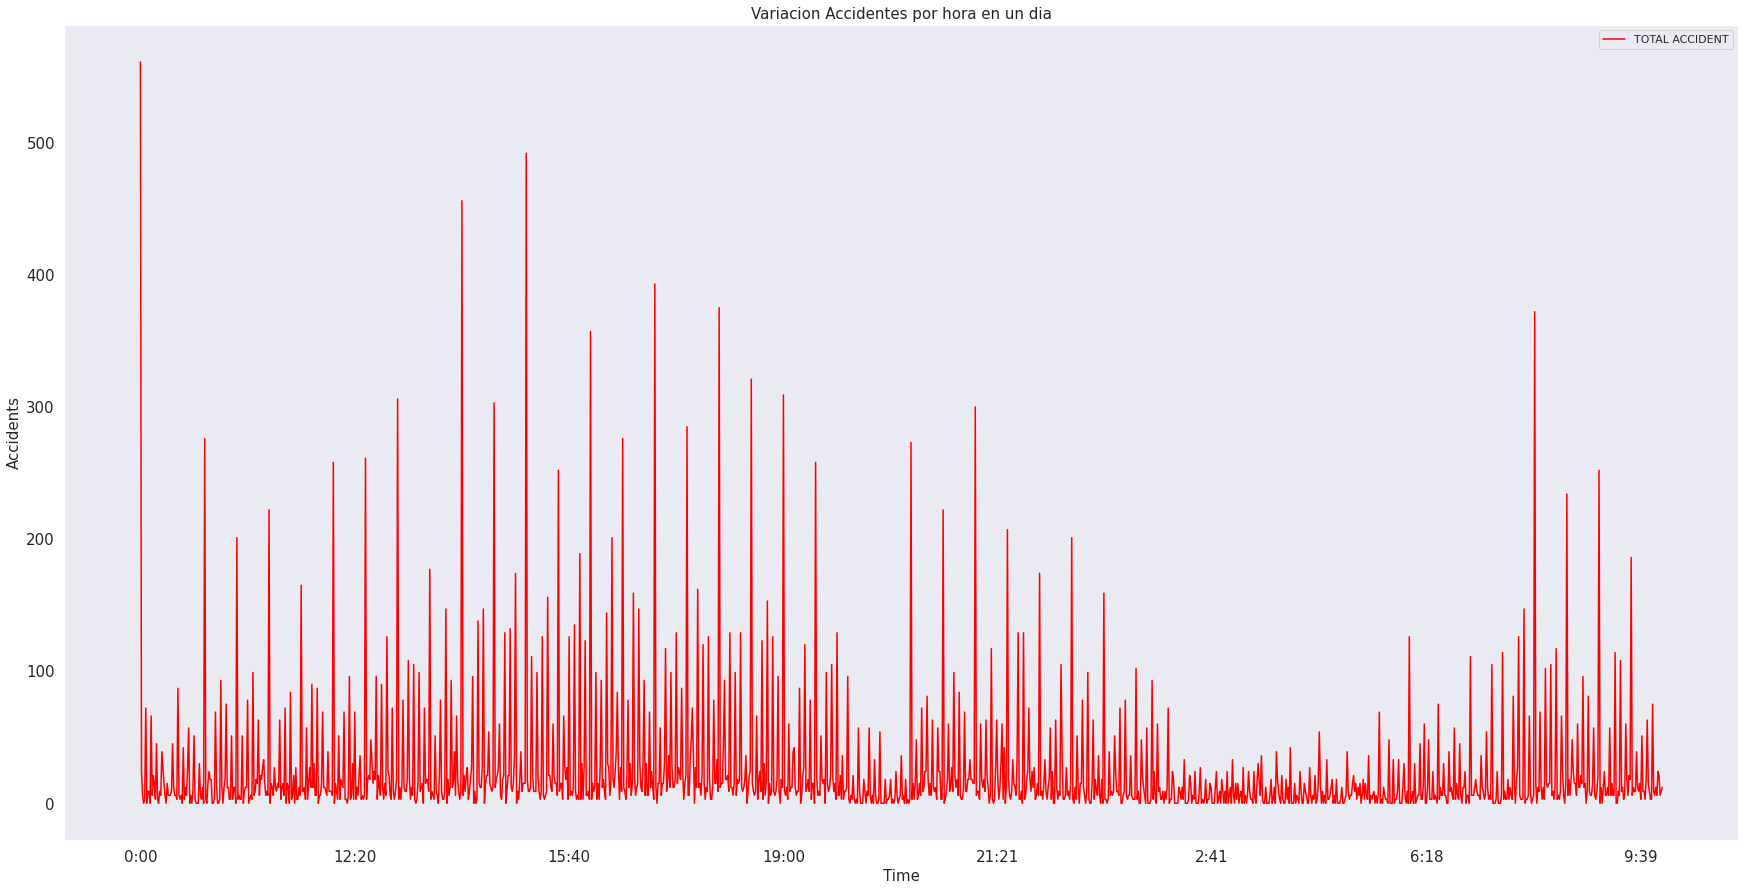

In [255]:
sns.set(rc={'figure.figsize':(30,15)})
dfp4.plot(kind='line',legend='Reverse',color='red',fontsize=15)
plt.ylabel('Accidents',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.grid()
plt.title("Variacion Accidentes por hora en un dia",fontsize=15)

la mayor accidentalidad en el transcurso de un solo dia se da a las 0:00 horas o doce de la madrugada

## Parte 3: Accidentes por día laborable

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

In [ ]:
# Escriba su código aquí


In [188]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
import datetime

In [ ]:
df = pd.read_csv('accidents_sample.csv',sep= ';')
df[:10]

In [ ]:
print(df.dtypes)
df['DATE']=pd.to_datetime(df['DATE'])
print('\n')
print(df.dtypes)

In [ ]:
df['Week_Day'] = df['DATE'].dt.strftime('%A')
df

In [ ]:
dfp3=df.drop(columns=['DATE','TIME','BOROUGH','ON STREET NAME','ZIP CODE','LATITUDE','LONGITUDE','COLLISION_ID','VEHICLE TYPE CODE 5','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 1','CONTRIBUTING FACTOR VEHICLE 5','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 1'])
dfp3

In [ ]:
dfp3.dtypes

In [ ]:
dfp2=dfp3.groupby(['Week_Day']).sum()
dfp2

Text(0.5, 1.0, 'weekend accident')

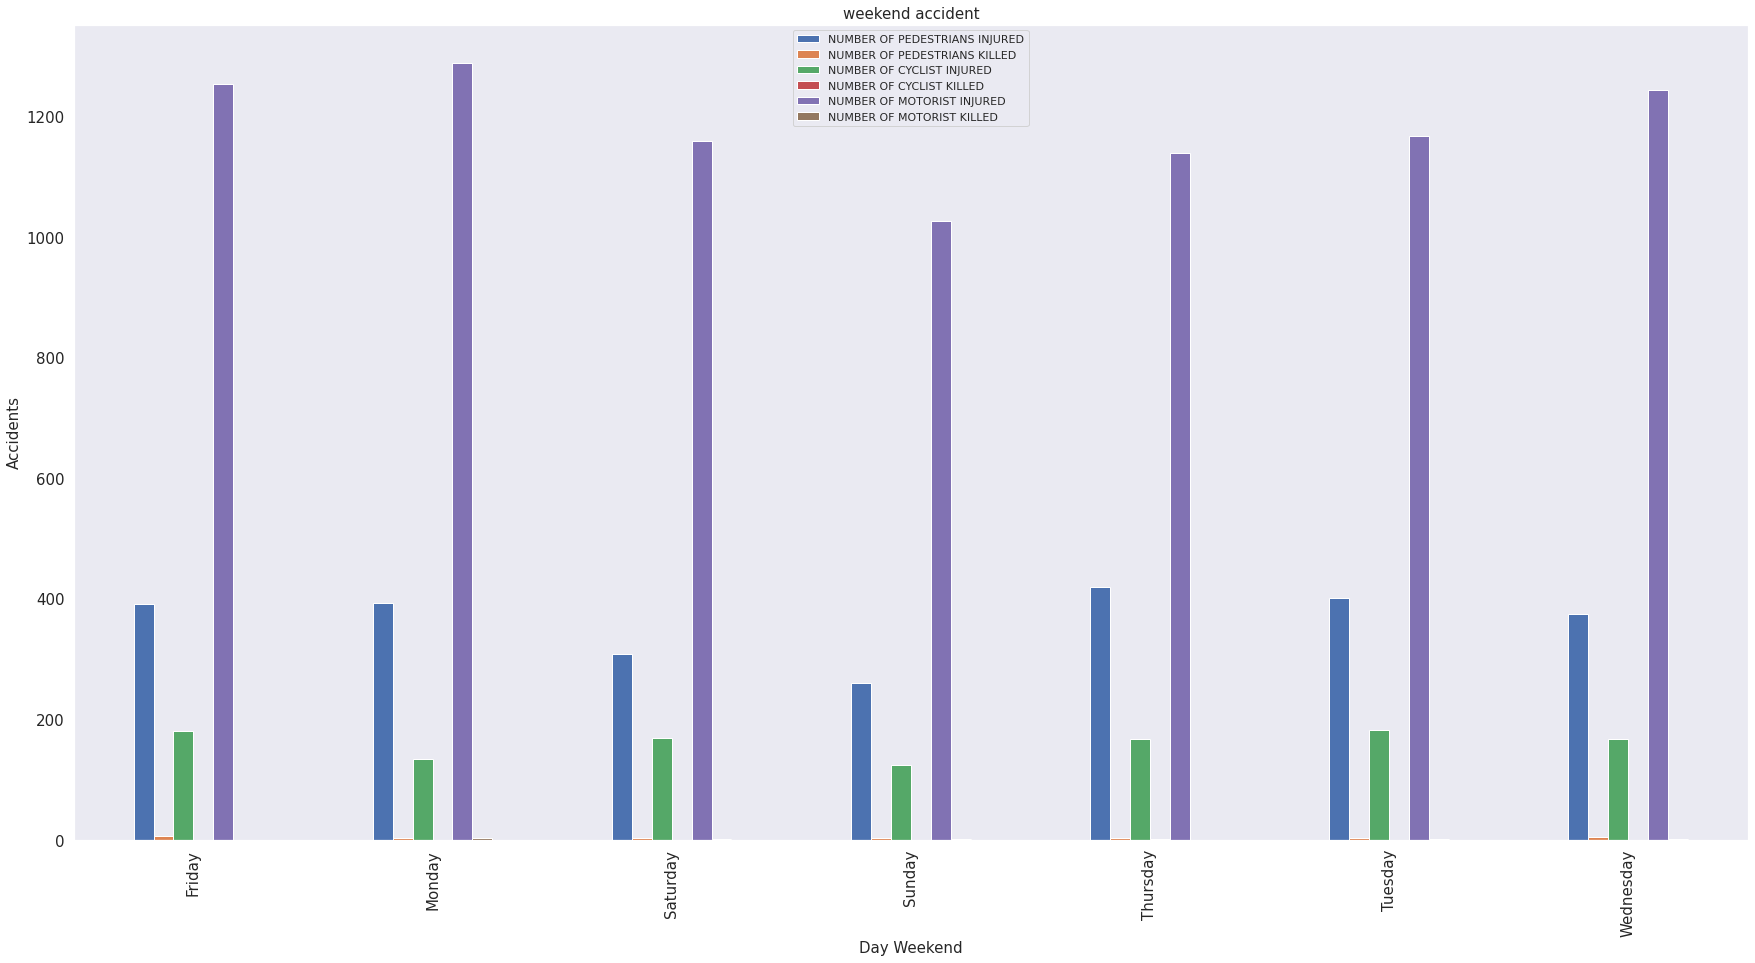

In [266]:
sns.set(rc={'figure.figsize':(30,15)})
dfp2.plot(kind='bar',legend='Reverse',fontsize=15)
plt.ylabel('Accidents',fontsize=15)
plt.xlabel('Day Weekend',fontsize=15)
plt.grid()
plt.title("weekend accident",fontsize=15)


la mayor accidentalidad 
1. se presenta el dia lunes para motociclistas lesionados
2. se presenta el dia jueves para peatones lesionados 
3. se presenta el dia martes para ciclistas lesionados
4. la probabilidad de que aumente los accidentes durante el fin de semana es baja

## Parte 4: Análisis de comuna

Trace un gráfico de barras del número total de accidentes en cada comuna, así como uno de los accidentes por kilómetro cuadrado por comuna. ¿Qué puedes concluir?

In [197]:
# Escriba su código aquí
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('accidents_sample.csv',sep= ';')
df[:10]

In [ ]:
dfpc=df.drop(columns=['DATE','TIME','ON STREET NAME','ZIP CODE','LATITUDE','LONGITUDE','COLLISION_ID','VEHICLE TYPE CODE 5','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 1','CONTRIBUTING FACTOR VEHICLE 5','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 1'])
dfpc

In [200]:
borough_data = {'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}

In [ ]:
dfpb2=dfpc.groupby(['BOROUGH']).sum()
dfpb2.head()

Text(0.5, 1.0, 'Variacion Accidentes por comunas')

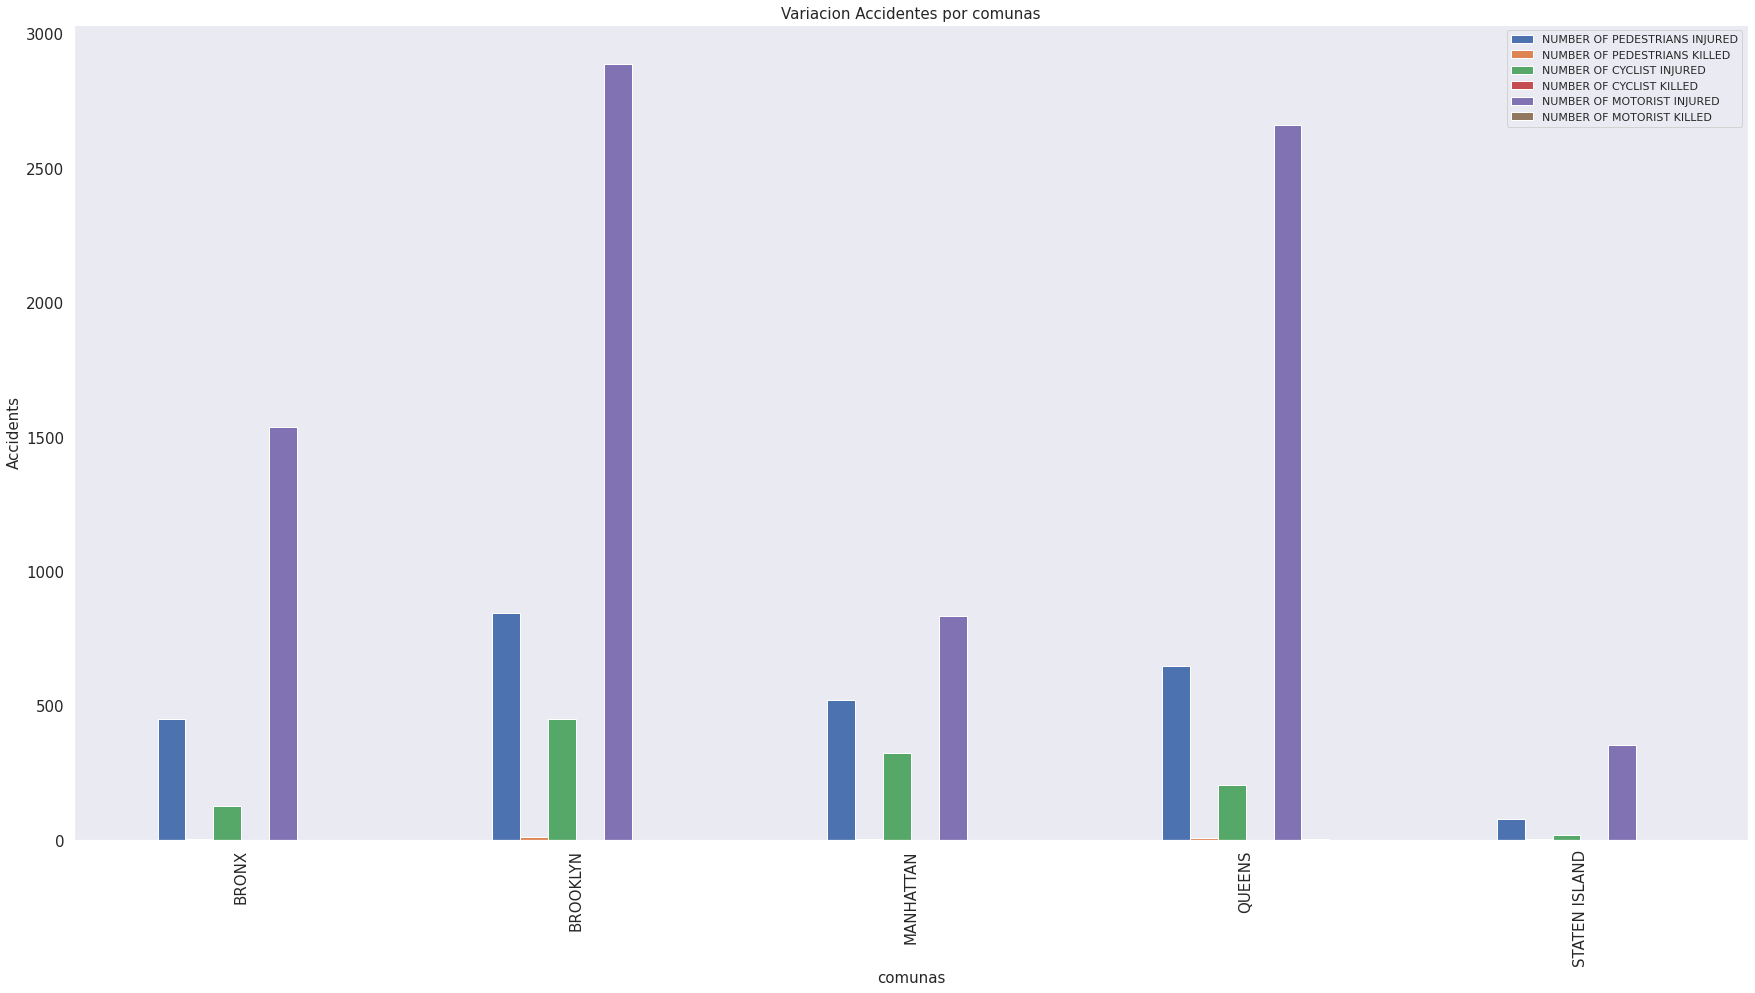

In [253]:
sns.set(rc={'figure.figsize':(30,15)})
dfpb2.plot(kind='bar',legend='Reverse',fontsize=15)
plt.ylabel('Accidents',fontsize=15)
plt.xlabel('comunas',fontsize=15)
plt.grid()
plt.title("Variacion Accidentes por comunas",fontsize=15)

1. En la comuna Brooklyn se presenta el mayor numero de motociclistas lesionados
2. En la comuna Brooklyn se presenta el mayor numero de ciclistas lesionados
3. En la comuna Brooklyn se presenta el mayor numero de peatones lesionados


## Parte 5: Análisis por hora del comuna

¿Qué horas tienen más accidentes en cada comuna? Trace un gráfico de barras para cada comuna que muestre el número de accidentes por cada hora del día.

In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Escriba su código aquí
df = pd.read_csv('accidents_sample.csv',sep= ';')
df[:10]

In [ ]:
print(df.dtypes)

In [ ]:
dft2=df.groupby(['BOROUGH','TIME']).sum()
dft2

In [ ]:
dft2.dtypes

In [ ]:
dft3=dft2.drop(columns=['ZIP CODE','LATITUDE','LONGITUDE','COLLISION_ID'])
dft3

In [ ]:
dft3['TOTAL ACCIDENT'] = dft3.sum(axis=1)
dft3

In [ ]:
dfb3=dft3.drop(columns=['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'])
dfb3

Text(0.5, 1.0, 'Variacion Accidentes por comunas')

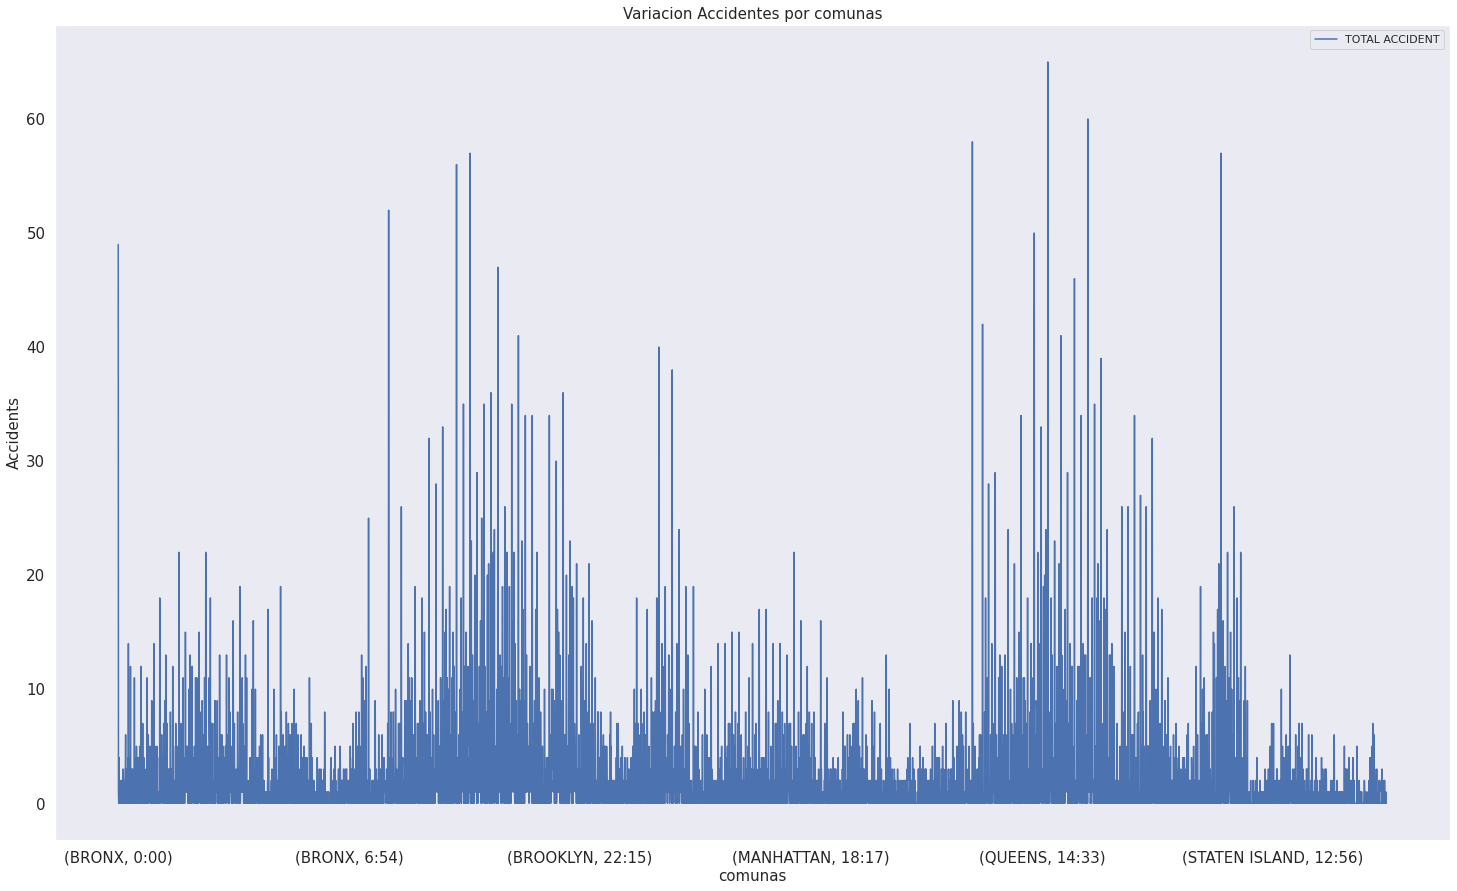

In [254]:
sns.set(rc={'figure.figsize':(25,15)})
dfb3.plot(kind='line',legend='Reverse',fontsize=15)
plt.ylabel('Accidents',fontsize=15)
plt.xlabel('comunas',fontsize=15)
plt.grid()
plt.title("Variacion Accidentes por comunas",fontsize=15)

Las horas por comuna con mayor accidentalidad son:
1. Queens se da la mayor accidentalidad a las 14:33
2. Manhathan se da la mayor accidentalidad a las 18:17
3. Brooklin se da la mayor accidentalidad a las 22:15
4. Bronx se da la mayor accidentalidad a las 00:01 y 6:54 
5. Staten Island se da la mayor accidentalidad a las 12:56

## Parte 6: Causa de accidentes

¿Qué factores provocan la mayoría de los accidentes?

In [234]:
# Escriba su código aquí
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('accidents_sample.csv',sep= ';')
df[:10]

In [ ]:
df.dtypes

In [ ]:
dfa2=df.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).sum()
dfa2.head(10)

In [ ]:
dfa3=dfa2.drop(columns=['ZIP CODE','LATITUDE','LONGITUDE','COLLISION_ID'])
dfa3

In [ ]:
dfa3['TOTAL ACCIDENT'] = dfa3.sum(axis=1)
dfa3


In [ ]:
dfa4=dfa3.drop(columns=['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'])
dfa4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

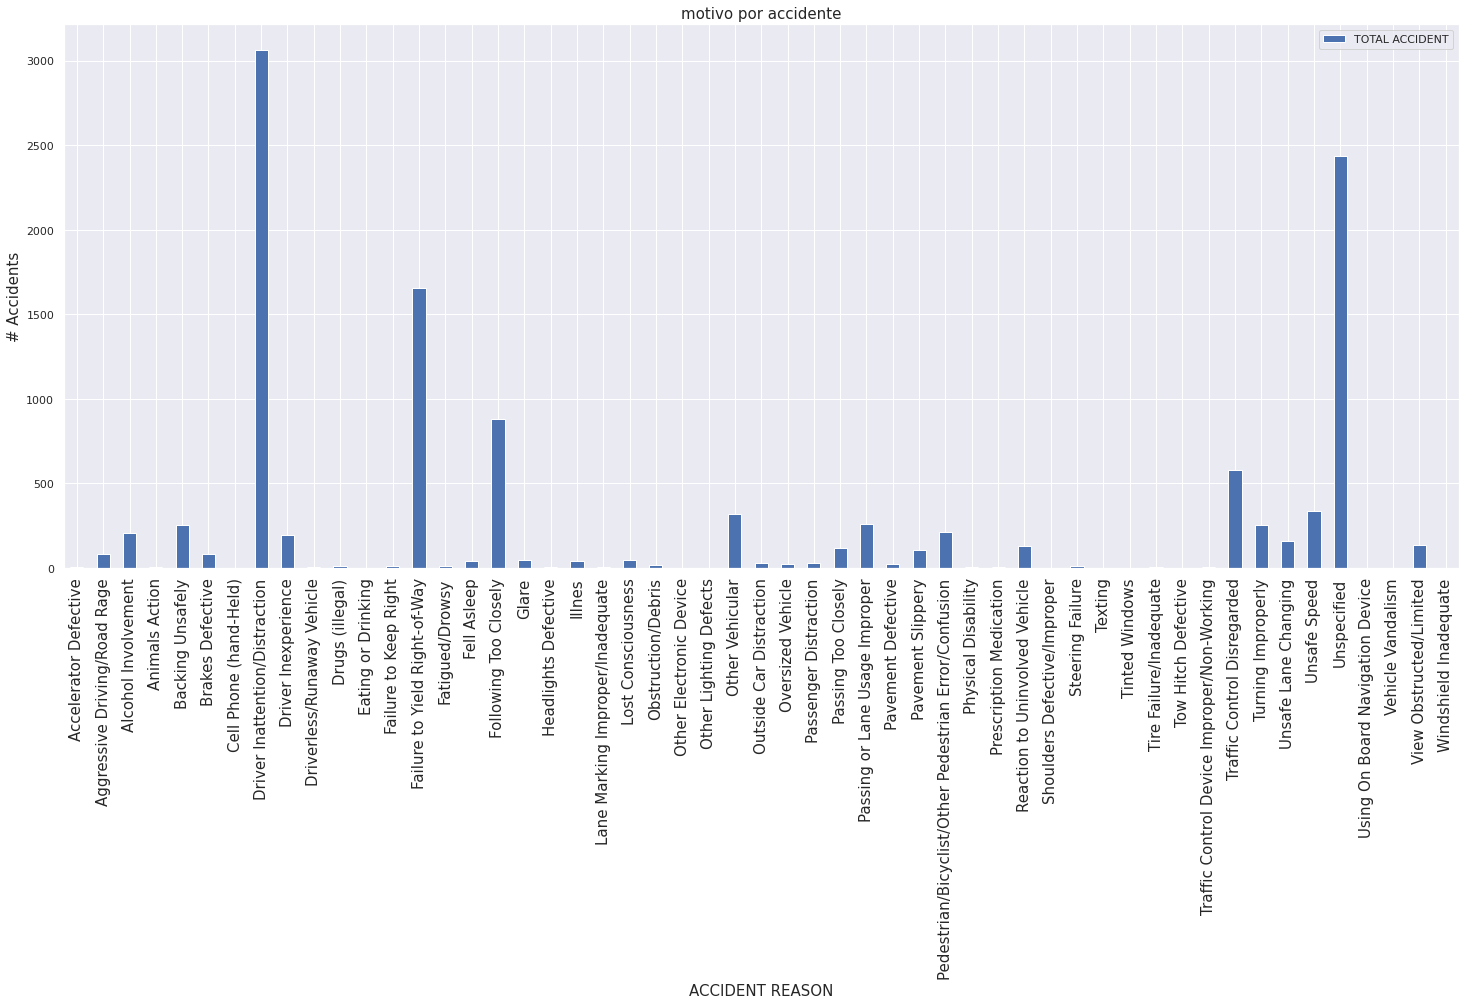

In [248]:
sns.set(rc={'figure.figsize':(25,10)})
dfa4.plot(kind='bar',legend='Reverse')
plt.ylabel('# Accidents', fontsize=15)
plt.xlabel('ACCIDENT REASON', fontsize=15)
plt.title("motivo por accidente",fontsize=15)
plt.xticks(rotation=90,fontsize=15)

uno de los motivos por los cuales se presentaron mas accidentes son: 

1. Falta de atención / distracción del conductor con 3061 accidentes
2. Sin especificar con 2435 accidentes
3. No ceder el derecho de paso con 1654
4. demasiado de cerca con 879
5. Control de tráfico ignorado con 577